In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#!pip install TextBlob

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

In [4]:
df = pd.read_csv('../../cyberbullying/data/dataset.csv')
df.head()

,text,target
0,this one can make an analogy in mathematical t...,0.0
1,clarification for you and zundark s right i sh...,0.0
2,elected or electoral jhk,0.0
3,this is such a fun entry devotchka i once had ...,0.0
4,please relate the ozone hole to increases in c...,0.0


In [5]:
df.shape

(227541, 2)

In [6]:
percentage_used = 1
df = df.sample(frac=percentage_used, random_state=0)

In [7]:
df['word_count'] = df["text"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['avg_word_length'] = df['char_count'] / df['word_count']

#df['sentence_count'] = df["text"].apply(lambda x: len(str(x).split(".")))
#df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']

df.head()

,text,target,word_count,char_count,avg_word_length
78942,i ve reverted you for removing valid albeit un...,0.0,66,330,5.000000
216516,and if he die out there ima eat the mufucka pu...,0.0,156,607,3.891026
34247,you are threatening to ban a longstanding cont...,0.0,22,99,4.500000
185853,they appealed against the conviction sentences...,0.0,145,647,4.462069
167710,the holocaust is a lie perpetrated by the zion...,1.0,10,46,4.600000


In [8]:
df["sentiment"] = df['text'].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)
df.head()

,text,target,word_count,char_count,avg_word_length,sentiment
78942,i ve reverted you for removing valid albeit un...,0.0,66,330,5.000000,0.200000
216516,and if he die out there ima eat the mufucka pu...,0.0,156,607,3.891026,-0.043254
34247,you are threatening to ban a longstanding cont...,0.0,22,99,4.500000,-0.500000
185853,they appealed against the conviction sentences...,0.0,145,647,4.462069,0.087333
167710,the holocaust is a lie perpetrated by the zion...,1.0,10,46,4.600000,0.000000


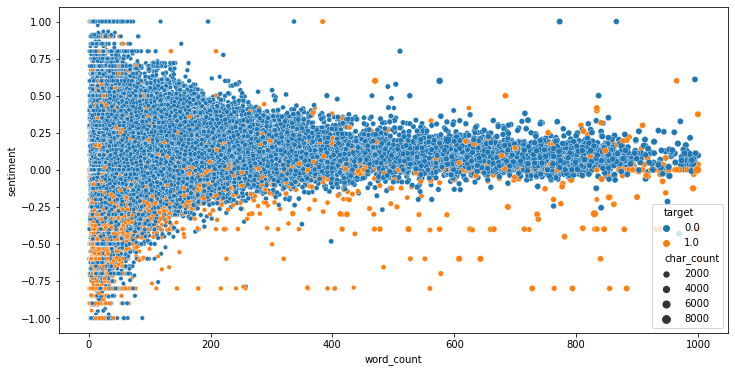

In [9]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='word_count', y='sentiment', size='char_count', hue='target');

In [10]:
df[df["text"].str.contains("nigga")]

,text,target,word_count,char_count,avg_word_length,sentiment
13492,nigga ya knoe i m down mayne i m down if we ga...,1.0,33,97,2.939394,-0.155556
25605,niggah hey fool whyd you delete my article,1.0,8,35,4.375000,0.000000
219613,its comedy u fuckin hater nigga prolly is smas...,1.0,12,53,4.416667,0.000000
223715,nigga no the fuck they dont flop u obviously n...,1.0,22,94,4.272727,-0.066667
202687,jiggathatnigga http t co gtmkbqyiqk,0.0,5,31,6.200000,0.000000
...,...,...,...,...,...,...
215877,you are like the model for the girl i want to ...,0.0,137,539,3.934307,0.068367
13553,pissed of nigger a lot of computers in my scho...,1.0,48,169,3.520833,-0.270833
65017,lil wayne plans on doing a remix to the track ...,0.0,21,86,4.095238,0.193182
215626,artists grow her ass he half sings and half wh...,1.0,252,969,3.845238,-0.018429


In [11]:
df['text'][220615]

'so you fuck your dogs your a sick fuuk nby bitches i was talking about women nbut the point you just tried to make makes me want to fuk you up even more'

In [12]:
from collections import Counter
import re

In [13]:
df['text'][0]

'this one can make an analogy in mathematical terms by envisioning the distribution of opinions in a population as a gaussian curve we would then say that the consensus would be a statement that represents the range of opinions within perhaps three standard deviations of the mean opinion sounds arbitrary and ad hoc does it really belong in n encyclopedia article i don t see that it adds anything useful the paragraph that follows seems much more useful are there any political theorists out there who can clarify the issues it seems to me that this is an issue that locke rousseau de toqueville and others must have debated sr'

In [14]:
text = df['text'][220615]
text = re.sub("[^\w ]", "", text)

words = text.split(" ")
Counter(words).most_common(10)

[('you', 3),
 ('your', 2),
 ('to', 2),
 ('so', 1),
 ('fuck', 1),
 ('dogs', 1),
 ('a', 1),
 ('sick', 1),
 ('fuuk', 1),
 ('nby', 1)]

In [15]:
from cyberbullying.data import Data

In [16]:
data = Data().get_clean_data()

In [17]:
data.head()

,text,target
0,this one can make an analogy in mathematical t...,0.0
1,clarification for you and zundark s right i sh...,0.0
2,elected or electoral jhk,0.0
3,this is such a fun entry devotchka i once had ...,0.0
4,please relate the ozone hole to increases in c...,0.0


In [18]:
data.shape

(227541, 2)